Introduction
The Boston Housing Dataset, originally published by Harrison and Rubinfeld in 1978, is a widely used dataset in machine learning. It consists of 506 instances, each representing different sections of the Boston suburbs. The dataset provides insights into the housing values in suburbs of Boston and includes 13 different attributes such as average number of rooms per dwelling, property tax rate, pupil-teacher ratio, etc., along with the median value of owner-occupied homes. The main task associated with this dataset is to predict the median value of the houses based on these features.

In this project, our objective is to apply various machine learning models to predict the median value of owner-occupied homes. The models that we will explore include Linear Regression, Decision Tree, Random Forest, and Gradient Boosting. Each model has its strengths and weaknesses, and their performance can vary depending on the dataset. Therefore, we aim to train each model on the dataset and evaluate their performance to identify the best model for this specific task.

The project is structured as follows: we start by preprocessing the data, which includes handling missing values, feature scaling, and splitting the dataset into a training set and a test set. Then, we proceed to train each model using the training data and evaluate their performance based on their R2 score on the test data. We also visually compare the performance of the models and conduct a residual analysis for the best model.

By the end of this project, we aim to identify the best model for predicting the median value of homes in the Boston Housing dataset and gain insights into the factors that significantly impact housing values.

In [121]:
import pandas as pd

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv("housing.data", delim_whitespace=True, header=None, names=column_names)


In [122]:
new_column_names = {
    "CRIM": "crime_rate",
    "ZN": "residential_zone",
    "INDUS": "non_retail_business",
    "CHAS": "charles_river",
    "NOX": "nox_concentration",
    "RM": "rooms_per_dwelling",
    "AGE": "age_of_houses",
    "DIS": "distance_to_employment",
    "RAD": "accessibility_to_highways",
    "TAX": "property_tax_rate",
    "PTRATIO": "pupil_teacher_ratio",
    "B": "black_population",
    "LSTAT": "lower_status_population",
    "MEDV": "median_home_value"
}

data = data.rename(columns=new_column_names)

data.head()

,crime_rate,residential_zone,non_retail_business,charles_river,nox_concentration,rooms_per_dwelling,age_of_houses,distance_to_employment,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,black_population,lower_status_population,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


       crime_rate  residential_zone  non_retail_business  charles_river   
count  506.000000        506.000000           506.000000     506.000000  \
mean     3.613524         11.363636            11.136779       0.069170   
std      8.601545         23.322453             6.860353       0.253994   
min      0.006320          0.000000             0.460000       0.000000   
25%      0.082045          0.000000             5.190000       0.000000   
50%      0.256510          0.000000             9.690000       0.000000   
75%      3.677083         12.500000            18.100000       0.000000   
max     88.976200        100.000000            27.740000       1.000000   

       nox_concentration  rooms_per_dwelling  age_of_houses   
count         506.000000          506.000000     506.000000  \
mean            0.554695            6.284634      68.574901   
std             0.115878            0.702617      28.148861   
min             0.385000            3.561000       2.900000   
25%      

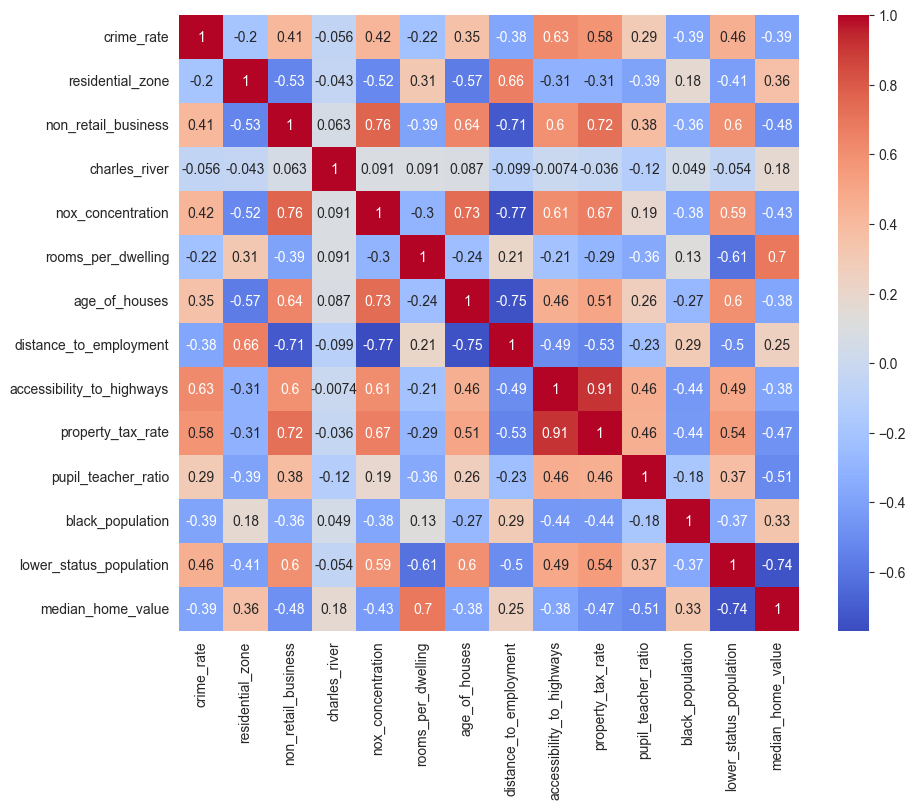

In [123]:
# Basic statistics
print(data.describe())

# Correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [124]:
print(data.isnull().sum())

crime_rate                   0
residential_zone             0
non_retail_business          0
charles_river                0
nox_concentration            0
rooms_per_dwelling           0
age_of_houses                0
distance_to_employment       0
accessibility_to_highways    0
property_tax_rate            0
pupil_teacher_ratio          0
black_population             0
lower_status_population      0
median_home_value            0
dtype: int64


We would standardize our independent variables to avoid poor perfomance of our models in later analysis. 

In [125]:
from sklearn.preprocessing import StandardScaler

X = data.drop("median_home_value", axis=1)
y = data["median_home_value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

some descriptive analysis of target variable and its relationship with other variables 

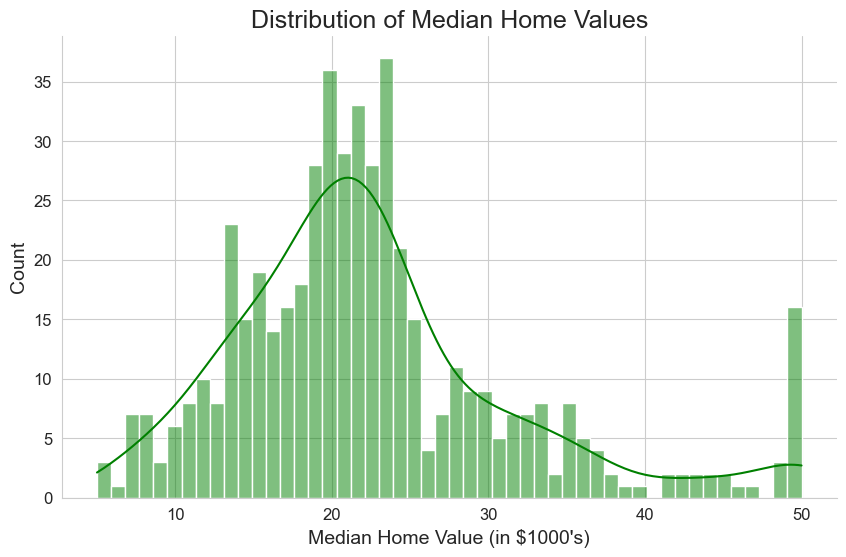

In [126]:
# frequency distributin of target

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['median_home_value'], bins=50, kde=True, stat='count', color="green", alpha=0.5)
plt.title('Distribution of Median Home Values', fontsize=18)
plt.xlabel('Median Home Value (in $1000\'s)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines
sns.despine(top=True, right=True)

plt.show()




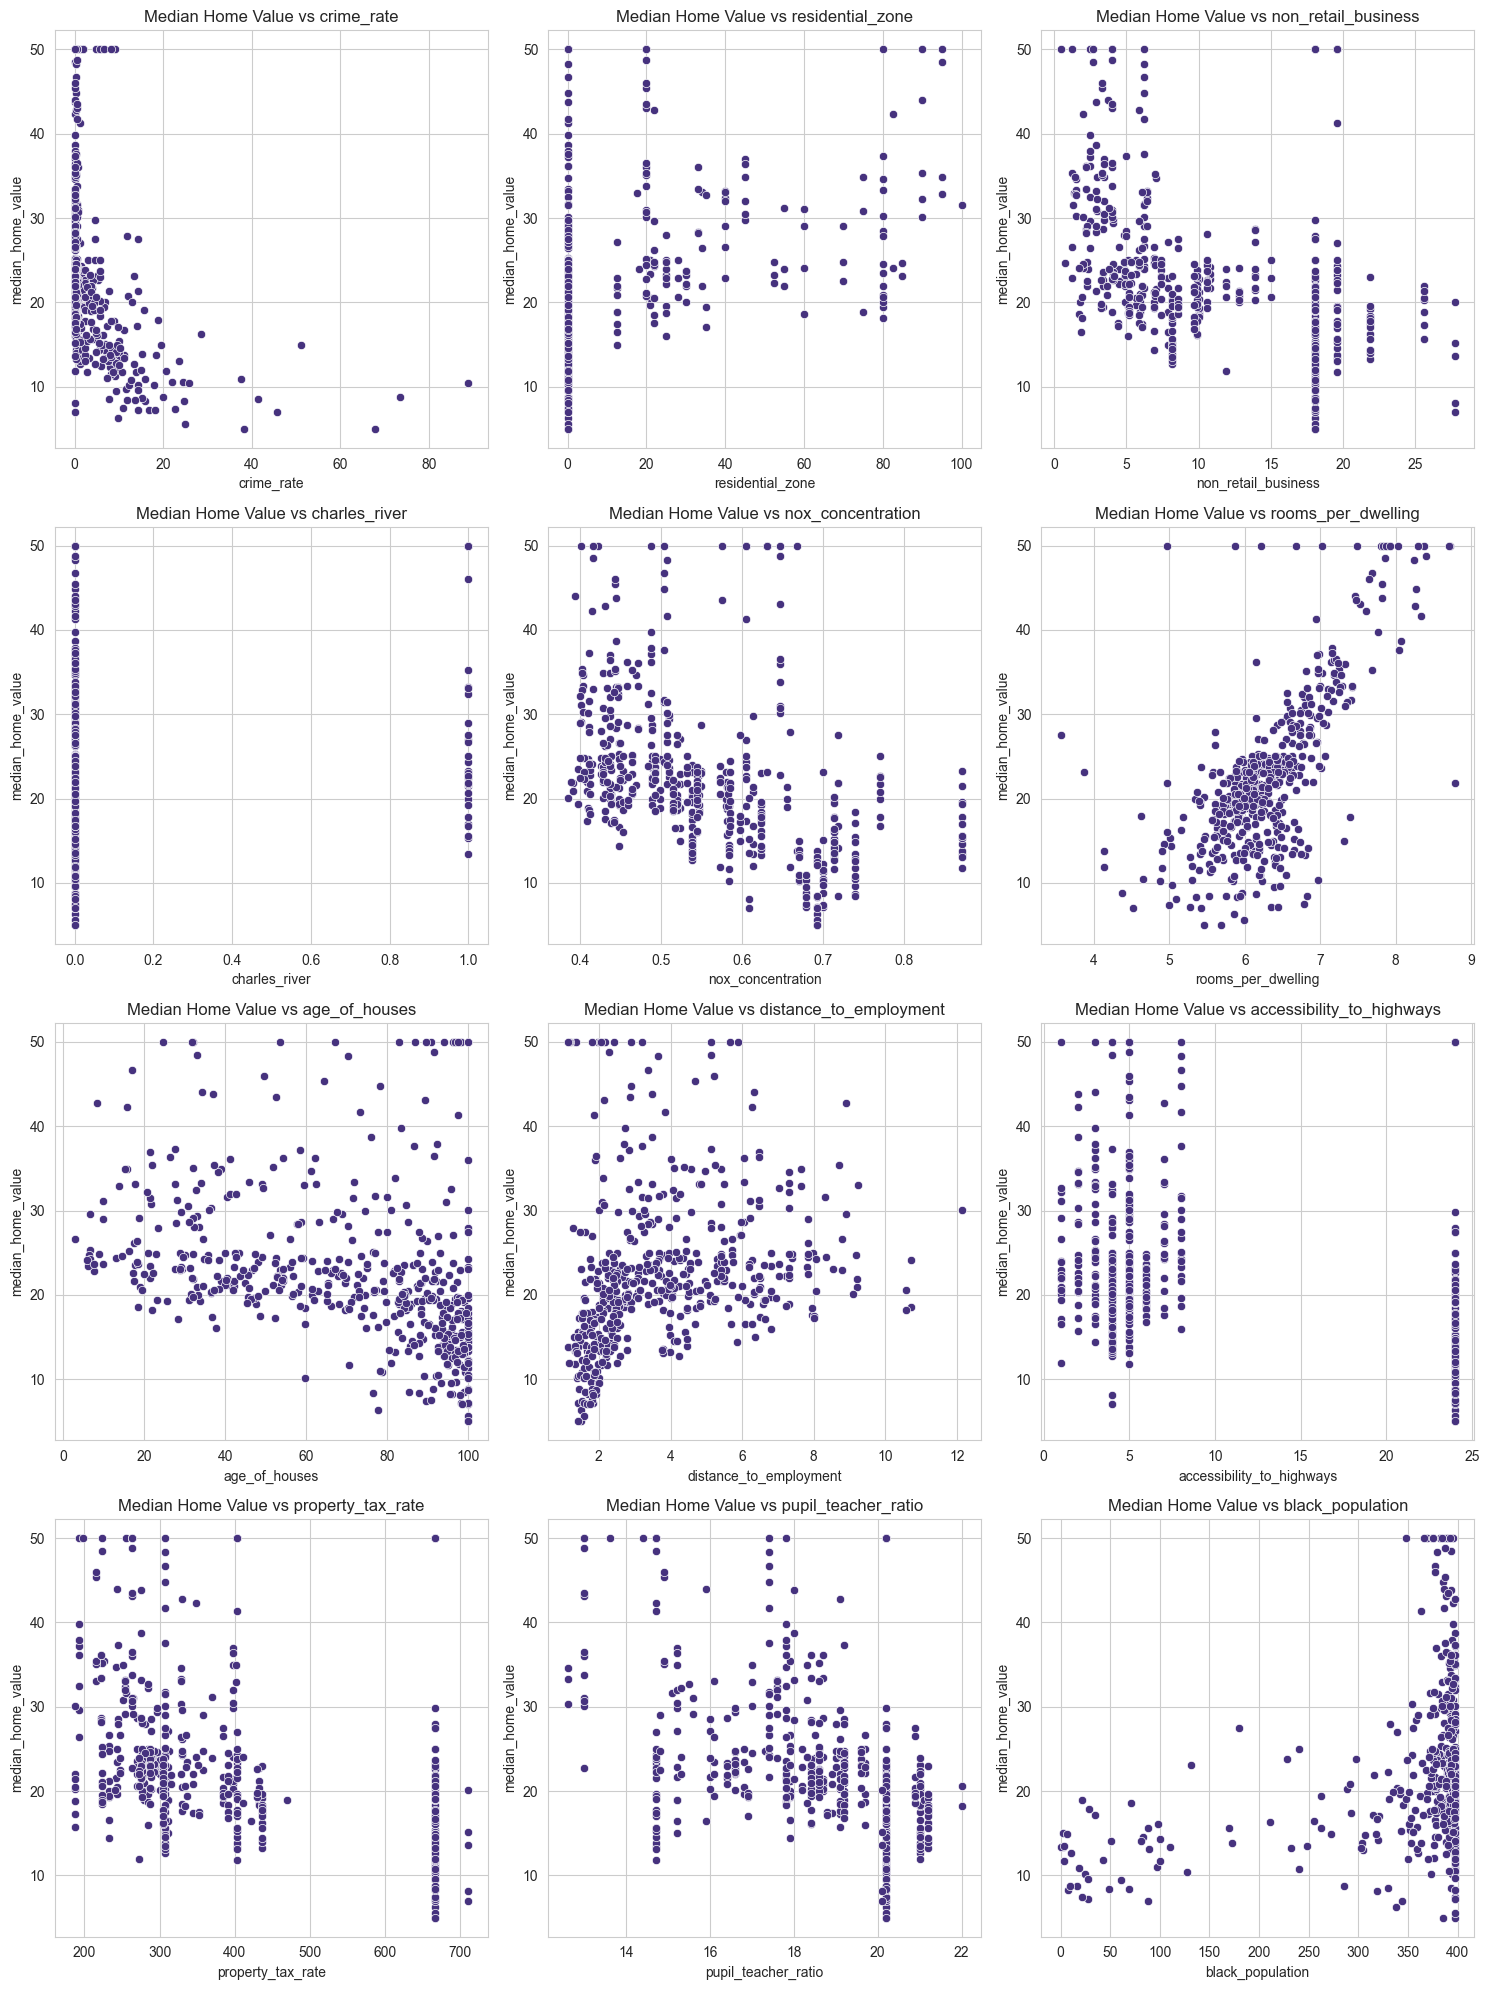

In [127]:

# Features correlation with target variable

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
for i, ax in enumerate(axs.flatten()):
    if i < len(X.columns):
        column_name = X.columns[i]
        sns.scatterplot(data=data, x=column_name, y='median_home_value', ax=ax)
        ax.set_title(f'Median Home Value vs {column_name}')
plt.tight_layout()
plt.show()



Crime rate: The plot shows a negative trend, indicating that as the crime rate per capita increases, the median home value tends to decrease. This makes sense as higher crime rates typically result in lower property values.

Residential zone: There isn't a clear trend, but the data points are more spread out for lower values of the proportion of residential land zoned for lots. This suggests that this feature might not have a strong linear relationship with the median home value.

Non-retail business: The plot indicates a weak negative relationship, as the proportion of non-retail business acres per town increases, the median home value seems to decrease slightly. This could be due to industrial areas generally having lower property values.

Charles river: This is a categorical variable, so a scatter plot might not be the best representation. A box plot would be more appropriate to compare the distribution of median home values for properties close to and far from the Charles River. We visualise this relationship in the next code. 

NOX concentration: The plot shows a negative relationship between NOX concentration and median home value, suggesting that higher levels of air pollution result in lower property values.

Number of rooms: There is a clear positive trend, indicating that as the average number of rooms per dwelling increases, the median home value increases. This is expected, as larger houses with more rooms usually have higher property values.

Age of the house: The plot shows a weak negative relationship, with older houses generally having lower median home values. This might be due to the depreciation of property value over time.

Distance to employement: There is a positive trend, suggesting that as the weighted distance to five employment centers increases, the median home value tends to increase. This could be because properties located farther from industrial areas have higher property values.

Highway accessibility: The plot doesn't show a clear linear trend, but we can observe that the median home value varies depending on the accessibility to radial highways.

Property tax rate : There is a weak negative relationship between the full-value property tax rate and median home value. Higher property tax rates may result in lower property values.

PTRATIO: As the pupil-teacher ratio increases, which could indicate a higher student population per teacher and potentially lower school quality, the median home value tends to decrease slightly. This might be due to families preferring areas with better-perceived education quality, which can have an impact on property values.

Black population: There seems to be a concentration of higher median home values when the proportion of black residents is high, but it is not a strong linear relationship. This feature may not be as useful for predicting median home values compared to other features in the dataset.

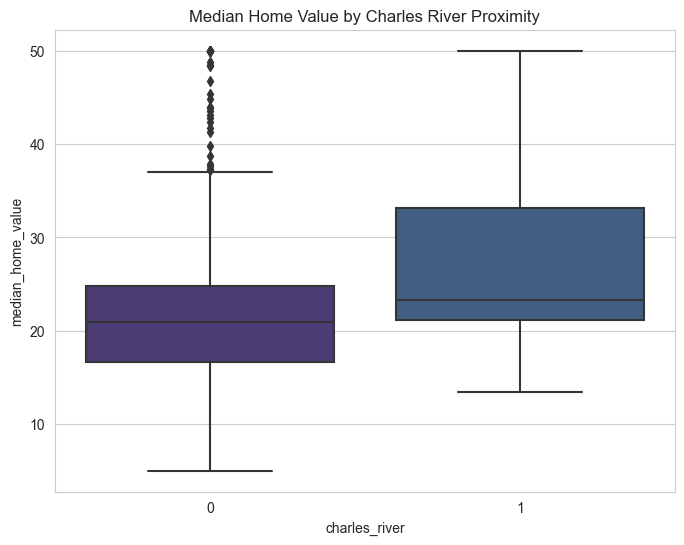

In [128]:
# catagorical variable relationship

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='charles_river', y='median_home_value')
plt.title('Median Home Value by Charles River Proximity')
plt.show()


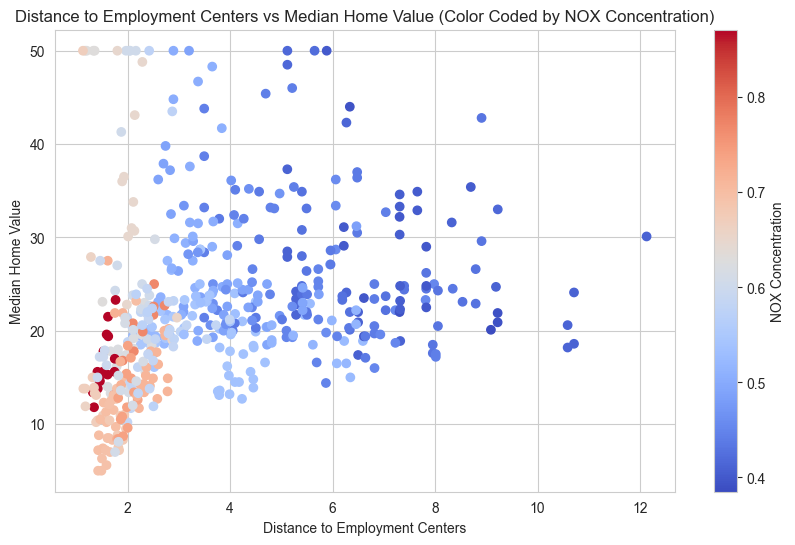

In [129]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data["distance_to_employment"], data["median_home_value"], c=data["nox_concentration"], cmap="coolwarm")
plt.colorbar(scatter, label="NOX Concentration")
plt.xlabel("Distance to Employment Centers")
plt.ylabel("Median Home Value")
plt.title("Distance to Employment Centers vs Median Home Value (Color Coded by NOX Concentration)")
plt.show()



The points on the plot are color-coded based on their nitric oxide (NOX) concentration levels, with a color gradient ranging from cooler colors (blue) for low concentrations to warmer colors (red) for high concentrations. 

Observations:
- There is a general trend of higher median home values as the distance to employment centers increases.
- Nitric oxide concentrations tend to be higher in areas with a shorter distance to employment centers


In [130]:
# removing black population variable

X = X.drop(columns=['black_population'])

# Scale the DataFrame without the 'B' column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Let's now fit different models

In [131]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [132]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test) # prediction on train
y_pred_lr = lr_model.predict(X_test) # prediction on test


# R-Squared Test
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")




Linear Regression - MSE: 21.115450613869548, R2: 0.7166209449097782


In [133]:
import math

mse_lr = 21.51744423117726
rmse_lr = math.sqrt(mse_lr)
print("Linear Regression - RMSE:", rmse_lr)


Linear Regression - RMSE: 4.638689926172827


on average, the Linear Regression model's predictions deviate from the true values by about $4,640.

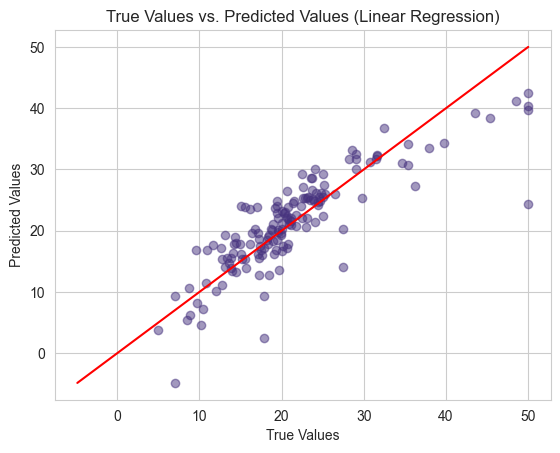

In [134]:

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Linear Regression)")
min_val = min(min(y_test), min(y_pred_lr))
max_val = max(max(y_test), max(y_pred_lr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()


In [135]:
# Decision tree

import pandas as pd
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - MSE:", mse_dt)
print("Decision Tree - R2:", r2_dt)


Decision Tree - MSE: 11.282697368421054
Decision Tree - R2: 0.8485810140830252


In [136]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)



In [137]:
# Fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [138]:
# Compare the models
results = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
                        'MSE': [mse_lr, mse_dt, mse_rf, mse_gb],
                        'R2': [r2_lr, r2_dt, r2_rf, r2_gb]})
print(results)

# Pick the best model based on the highest R2 score
best_model = results.loc[results['R2'].idxmax(), 'Model']
print("\nThe best model is:", best_model)

               Model        MSE        R2
0  Linear Regression  21.517444  0.716621
1      Decision Tree  11.282697  0.848581
2      Random Forest   9.676968  0.870131
3  Gradient Boosting   8.126570  0.890938

The best model is: Gradient Boosting


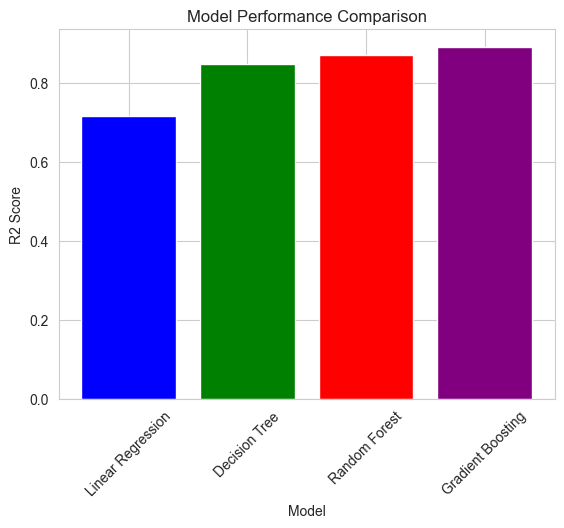

In [139]:
# Set up the bar plot
fig, ax = plt.subplots()

# Plot R2 scores for each model
ax.bar(results['Model'], results['R2'], color=['blue', 'green', 'red', 'purple'])

# Set plot title and axis labels
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('R2 Score')

# Display the plot
plt.xticks(rotation=45)
plt.show()




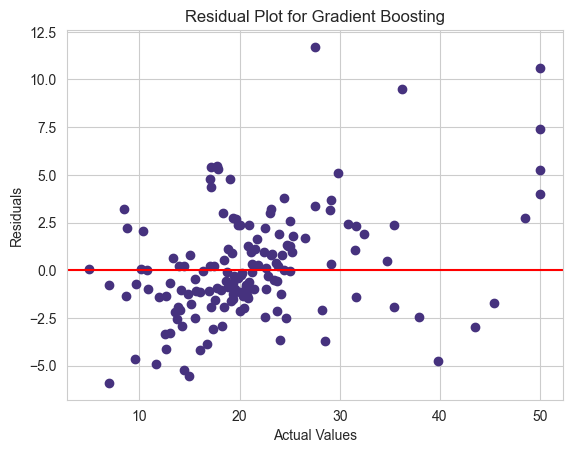

In [140]:
best_model = results.loc[results['R2'].idxmax(), 'Model']

# Generate predictions using the best model
if best_model == 'Linear Regression':
    best_model_predictions = y_pred_lr
elif best_model == 'Decision Tree':
    best_model_predictions = y_pred_dt
elif best_model == 'Random Forest':
    best_model_predictions = y_pred_rf
else:  # Gradient Boosting
    best_model_predictions = y_pred_gb

# Calculate residuals
residuals = y_test - best_model_predictions

# Plot residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title(f'Residual Plot for {best_model}')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()



Residuals are be randomly scattered around the horizontal line at 0, with no discernible pattern. This indicates that the models assumptions are valid and that the model is correctly capturing the relationship between the features and the target variable.

In this project, we aimed to predict the median value of homes in the Boston Housing dataset using various machine learning models, including Linear Regression, Decision Tree, Random Forest, and Gradient Boosting. We started by preprocessing the data, splitting it into training and testing sets, and scaling the features.

After training and evaluating the models, we compared their performance using R2 scores. The bar plot we created shows that Gradient Boosting had the highest R2 score, followed by Random Forest, Decision Tree, and Linear Regression. This indicates that the Gradient Boosting model performs the best in predicting the median value of homes in this dataset.

We also performed a residual analysis for the best model, which allowed us to visualize any patterns or issues in the predictions. The residual plot should ideally show no clear patterns, indicating that the model has captured the relationships in the data well.

In conclusion, the Gradient Boosting model performed the best in predicting the median value of homes in the Boston Housing dataset. Further tuning of the model's hyperparameters and exploring other advanced models can potentially yield even better results.